In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import csv
import urllib.request
%matplotlib inline

import librosa
import numpy as np
import os
import librosa.display
import seaborn as sns

In [2]:
# Opening dataset

df = pd.read_csv('bird_song_dataset.csv')
df.head()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,36065,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Frank Lambert,Peru,between Jaen and San Ignacio,NaN,...,This taxon is more usually called Chinchipe Sp...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
1,692727,Arremon,dorbignii,NaN,birds,Moss-backed Sparrow,Jacob Wijpkema,Bolivia,"Franz Tamayo, La Paz Department",-14.41850,...,"In Bolivia this is now called ""Moss-backed Spa...",yes,yes,no,NaN,NaN,no,NaN,NaN,44100
2,296852,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
3,296851,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",-5.49810,...,NaN,yes,yes,yes,NaN,NaN,no,NaN,NaN,44100
4,27768,Synallaxis,chinchipensis,NaN,birds,Chinchipe Spinetail,David Edwards,Peru,Chirinos,-5.24667,...,NaN,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100


In [3]:
df.tail()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
495,226865,Odontophorus,guttatus,NaN,birds,Spotted Wood Quail,Peter Boesman,Mexico,"Valle Nacional road, Oaxaca",17.666667,...,ID certainty 100%. (Archiv. tape 168 side A tr...,unknown,unknown,unknown,NaN,NaN,no,NaN,NaN,44100
496,185742,Odontophorus,guttatus,NaN,birds,Spotted Wood Quail,Carlos Funes,Honduras,"Reserva de Vida Silvestre El Armado, Olancho",14.895100,...,NaN,no,no,no,NaN,NaN,no,NaN,NaN,44100
497,185121,Odontophorus,guttatus,NaN,birds,Spotted Wood Quail,Carlos Funes,Honduras,"Montaña La Estrechura o Crudeza, Guata, Olancho",15.106800,...,NaN,no,no,no,NaN,NaN,no,NaN,NaN,44100
498,185120,Odontophorus,guttatus,NaN,birds,Spotted Wood Quail,Carlos Funes,Honduras,"Montaña La Estrechura o Crudeza, Guata, Olancho",15.106800,...,NaN,no,no,no,NaN,NaN,no,NaN,NaN,44100
499,126208,Odontophorus,guttatus,NaN,birds,Spotted Wood Quail,Mike Nelson,Guatemala,"Finca Las Nubes, forest above the coffee plant...",14.680500,...,Unseen birds down slope from the observation d...,no,no,no,NaN,NaN,no,NaN,NaN,44100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             500 non-null    int64  
 1   gen            500 non-null    object 
 2   sp             500 non-null    object 
 3   ssp            95 non-null     object 
 4   group          500 non-null    object 
 5   en             500 non-null    object 
 6   rec            500 non-null    object 
 7   cnt            500 non-null    object 
 8   loc            500 non-null    object 
 9   lat            451 non-null    float64
 10  lng            451 non-null    float64
 11  alt            451 non-null    object 
 12  type           500 non-null    object 
 13  sex            69 non-null     object 
 14  stage          54 non-null     object 
 15  method         500 non-null    object 
 16  url            500 non-null    object 
 17  file           500 non-null    object 
 18  file-name 

* Performing Data Analysis

In [5]:
# check null columns
df.isnull()

,id,gen,sp,ssp,group,en,rec,cnt,loc,lat,...,rmk,bird-seen,animal-seen,playback-used,temp,regnr,auto,dvc,mic,smp
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
496,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
497,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False
498,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,True,True,False


In [6]:
df['cnt'].unique()

array(['Peru', 'Bolivia', 'Argentina', 'Papua New Guinea', 'New Zealand',
       'Uruguay', 'Brazil', 'Paraguay', 'Australia', 'Indonesia',
       'Zambia', 'South Africa', 'Senegal', 'India', 'Thailand', 'China',
       'Mongolia', 'Russian Federation', 'South Korea', 'Japan',
       'Cambodia', 'United States', 'Ecuador', 'Colombia', 'Venezuela',
       'Costa Rica', 'Honduras', 'El Salvador', 'Nicaragua', 'Panama',
       'Mexico', 'Guatemala'], dtype=object)

In [7]:
#displays the number of columns in and array
df.columns

Index(['id', 'gen', 'sp', 'ssp', 'group', 'en', 'rec', 'cnt', 'loc', 'lat',
       'lng', 'alt', 'type', 'sex', 'stage', 'method', 'url', 'file',
       'file-name', 'sono', 'osci', 'lic', 'q', 'length', 'time', 'date',
       'uploaded', 'also', 'rmk', 'bird-seen', 'animal-seen', 'playback-used',
       'temp', 'regnr', 'auto', 'dvc', 'mic', 'smp'],
      dtype='object')

In [8]:
#counts the number of missing values in a specified column
df['url'].isnull().sum()

0

In [9]:
#identifying different sounds in the dataset

df['type'].unique()

array(['call, song', 'song', 'call', 'rattle', 'duet, song', 'duet',
       'alarm (take off)', 'alarm call', 'song, song a',
       'call, flight call, call & flight call', 'fligth', '?',
       'flight call', 'flight call, water lapping',
       'flight call, caco frog', 'alarm call, call',
       'wings flapping sound', 'takeoff noise', 'wingbeats', 'call, duet',
       'canto', 'call, song, call and song', 'alarm call, alarm calls',
       'call, calls', 'call, alternate call', 'song?',
       'call, song, calls. song.', 'chorus', 'flock', 'call, ?',
       'dawn chorus', 'song, duet?', 'uncertain', 'call, allarm calls',
       'call, song, calls', 'call, aggression calls', 'alarm call?',
       'call, calls. wing whirrs.',
       'alarm call, alarm calls, wing sounds',
       'alarm call, agitated alarm calls', 'call, wing sound',
       'wing whirr', 'begging call', 'call, agitated calls',
       'call, contact calls',
       'call, song, contact calls and song by a pair', 'dawn 

## DATA Visualization
 ENSURE THAT ALL FILES ARE COMPATIBLE TO THE MODEL
 

In [10]:
alarm_call = os.path.join("bird_sounds", "alarm_calls", "2679.mp3")
mating_call = os.path.join("bird_sounds", "duet_calls", "10009.mp3")
other_call = os.path.join("bird_sounds", "other_calls", "10011.mp3")

In [11]:
alarm_call

'bird_sounds\\alarm_calls\\2679.mp3'

In [12]:
alarm_call_y, alarm_call_sr = librosa.load(alarm_call)
print(f'y:{alarm_call_y[:10]}')
print(f'shape y:{alarm_call_y.shape}')
print(f'sr:{alarm_call_sr}')


y:[-9.3132257e-10 -9.3132257e-10  1.6298145e-09 -9.3132257e-10
  1.1641532e-09 -3.7252903e-09  6.9849193e-10 -9.3132257e-09
  9.3132257e-10 -8.3819032e-09]
shape y:(1112256,)
sr:22050


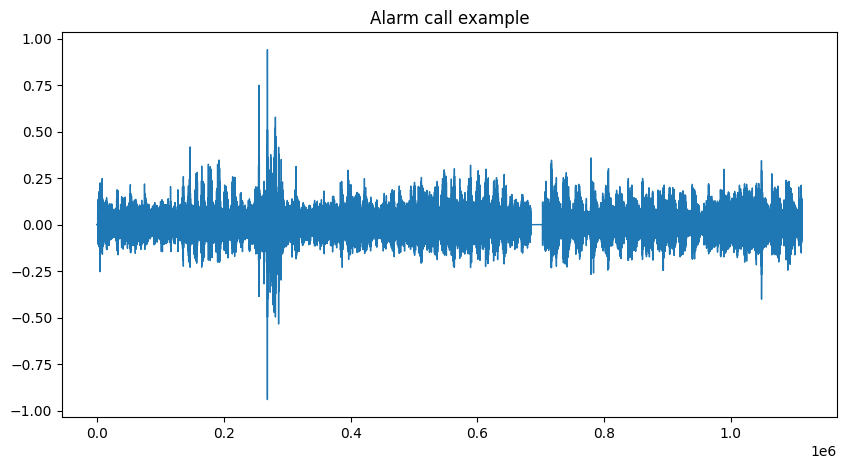

In [13]:
# plotting the numpy array of the audio
pd.Series(alarm_call_y).plot(figsize = (10, 5), lw=1,                 title = "Alarm call example")
plt.show()

In [14]:
mating_call_y, mating_call_sr = librosa.load(mating_call)
print(f'y:{mating_call_y[:10]}')
print(f'shape y:{mating_call_y.shape}')
print(f'sr:{mating_call_sr}')

y:[ 0.01797862  0.00306757 -0.01609175 -0.01392592  0.0006107  -0.00958849
 -0.01828765  0.01992371  0.03507416  0.01223934]
shape y:(124177,)
sr:22050


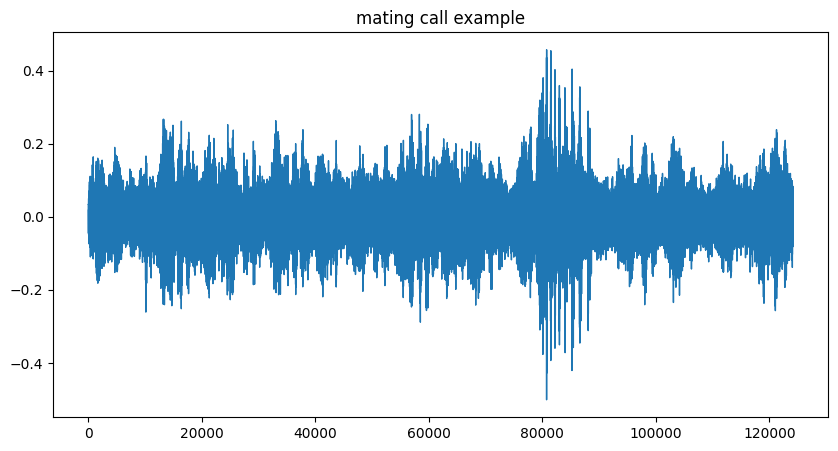

In [15]:
pd.Series(mating_call_y).plot(figsize = (10, 5), lw=1,
                 title = "mating call example")
plt.show()

In [16]:
other_call_y, other_call_sr = librosa.load(other_call)
print(f'y:{other_call_y[:10]}')
print(f'shape y:{other_call_y.shape}')
print(f'sr:{other_call_sr}')

y:[ 0.00512468 -0.00375166  0.01177868  0.02580953  0.01170507  0.01224367
 -0.00228665 -0.02078354  0.0018915   0.01605644]
shape y:(78972,)
sr:22050


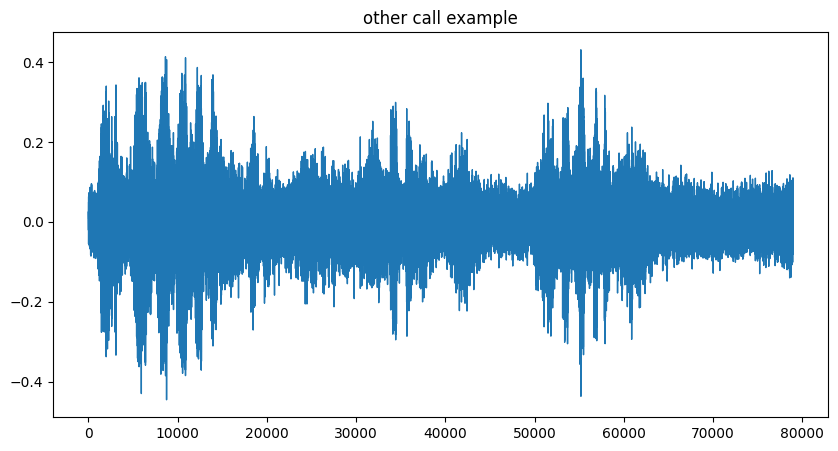

In [17]:
pd.Series(other_call_y).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

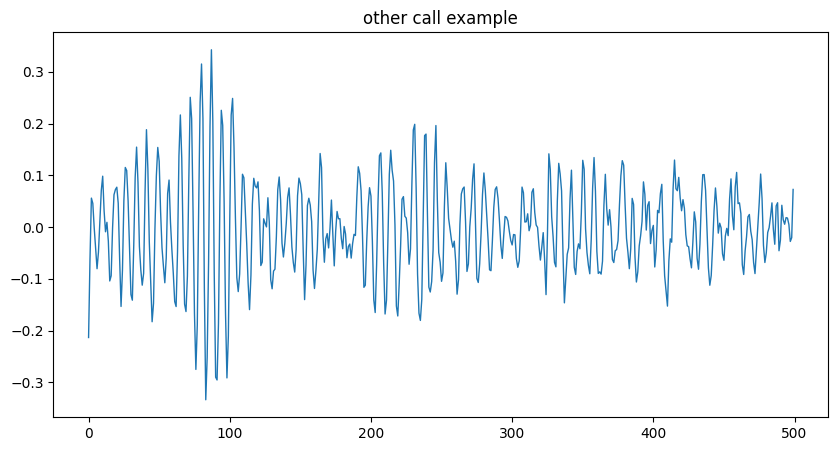

In [18]:
pd.Series(other_call_y[3000:3500]).plot(figsize = (10, 5), lw=1,
                 title = "other call example")
plt.show()

## spectogramm

In [19]:
D = librosa.stft(alarm_call_y)
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape

(1025, 2173)

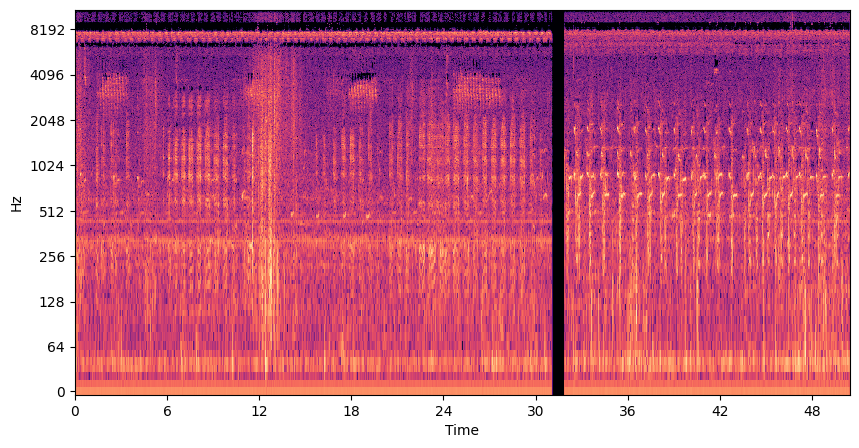

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)

## MEL SPECTROGRAM

In [21]:
S = librosa.feature.melspectrogram(y = alarm_call_y,
                                  sr = alarm_call_sr,
                                  n_mels = 128,
                                  )
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Text(0.5, 1.0, 'Mel spectrogram for alarm call ')

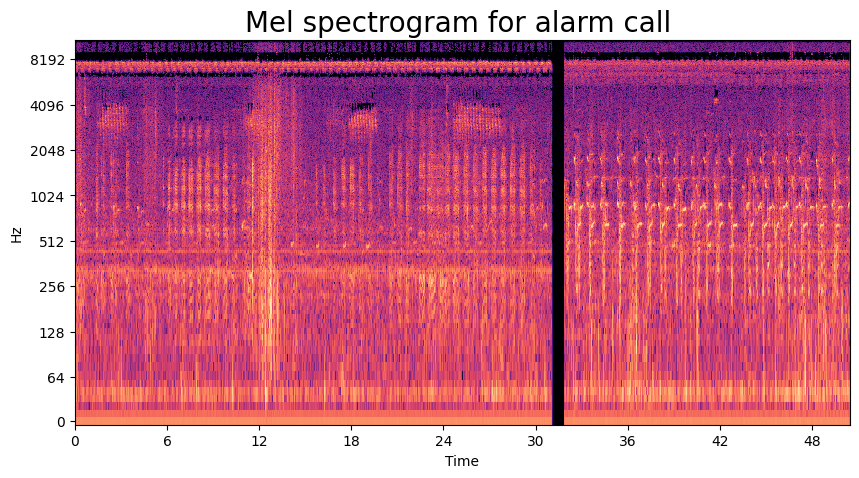

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax= ax)
ax.set_title('Mel spectrogram for alarm call ', fontsize = 20)

In [23]:
# Deleting a list of columns from the csv file
# These are not necessary for the model we want to implement
df.drop(['alt', 'stage','sex','also','rmk','temp','regnr','dvc','mic','lat','lng'], axis=1, inplace=True)


In [24]:
# Checking new dataset if above columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             500 non-null    int64 
 1   gen            500 non-null    object
 2   sp             500 non-null    object
 3   ssp            95 non-null     object
 4   group          500 non-null    object
 5   en             500 non-null    object
 6   rec            500 non-null    object
 7   cnt            500 non-null    object
 8   loc            500 non-null    object
 9   type           500 non-null    object
 10  method         500 non-null    object
 11  url            500 non-null    object
 12  file           500 non-null    object
 13  file-name      500 non-null    object
 14  sono           500 non-null    object
 15  osci           500 non-null    object
 16  lic            500 non-null    object
 17  q              500 non-null    object
 18  length         500 non-null   

In [25]:
#deleting ssp coulmn from the file.
df.drop('ssp', axis=1, inplace=True)


In [26]:
# Checking out new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             500 non-null    int64 
 1   gen            500 non-null    object
 2   sp             500 non-null    object
 3   group          500 non-null    object
 4   en             500 non-null    object
 5   rec            500 non-null    object
 6   cnt            500 non-null    object
 7   loc            500 non-null    object
 8   type           500 non-null    object
 9   method         500 non-null    object
 10  url            500 non-null    object
 11  file           500 non-null    object
 12  file-name      500 non-null    object
 13  sono           500 non-null    object
 14  osci           500 non-null    object
 15  lic            500 non-null    object
 16  q              500 non-null    object
 17  length         500 non-null    object
 18  time           500 non-null   

In [27]:
# Enables us to understand the data and identify potential data quality issues during the data cleaning process
df.describe()

,id,smp
count,500.000000,500.000000
mean,303745.330000,43608.850000
std,221827.397761,6361.358872
min,121.000000,8000.000000
25%,101730.750000,44100.000000
50%,270874.500000,44100.000000
75%,461364.500000,48000.000000
max,807776.000000,48000.000000


In [28]:
df.columns

Index(['id', 'gen', 'sp', 'group', 'en', 'rec', 'cnt', 'loc', 'type', 'method',
       'url', 'file', 'file-name', 'sono', 'osci', 'lic', 'q', 'length',
       'time', 'date', 'uploaded', 'bird-seen', 'animal-seen', 'playback-used',
       'auto', 'smp'],
      dtype='object')

In [29]:
df.head()

,id,gen,sp,group,en,rec,cnt,loc,type,method,...,q,length,time,date,uploaded,bird-seen,animal-seen,playback-used,auto,smp
0,36065,Synallaxis,chinchipensis,birds,Chinchipe Spinetail,Frank Lambert,Peru,between Jaen and San Ignacio,"call, song",field recording,...,no score,0:55,09:00,2006-07-03,2009-06-23,unknown,unknown,unknown,no,44100
1,692727,Arremon,dorbignii,birds,Moss-backed Sparrow,Jacob Wijpkema,Bolivia,"Franz Tamayo, La Paz Department",song,field recording,...,A,0:50,07:31,2021-12-02,2021-12-24,yes,yes,no,no,44100
2,296852,Synallaxis,chinchipensis,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",song,field recording,...,A,0:10,15:30,2015-06-18,2015-12-24,yes,yes,yes,no,44100
3,296851,Synallaxis,chinchipensis,birds,Chinchipe Spinetail,Ross Gallardy,Peru,"San Ignacio, Cajamarca",call,field recording,...,A,0:14,15:30,2015-06-18,2015-12-24,yes,yes,yes,no,44100
4,27768,Synallaxis,chinchipensis,birds,Chinchipe Spinetail,David Edwards,Peru,Chirinos,call,field recording,...,A,0:50,?:?,2006-08-00,2009-01-07,unknown,unknown,unknown,no,44100


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             500 non-null    int64 
 1   gen            500 non-null    object
 2   sp             500 non-null    object
 3   group          500 non-null    object
 4   en             500 non-null    object
 5   rec            500 non-null    object
 6   cnt            500 non-null    object
 7   loc            500 non-null    object
 8   type           500 non-null    object
 9   method         500 non-null    object
 10  url            500 non-null    object
 11  file           500 non-null    object
 12  file-name      500 non-null    object
 13  sono           500 non-null    object
 14  osci           500 non-null    object
 15  lic            500 non-null    object
 16  q              500 non-null    object
 17  length         500 non-null    object
 18  time           500 non-null   